# Customer Churn

# Goal:

* Isolate the key drivers for cusomer churn at Telco

* Use the key driver to develope a M.L model to accurately predict customer churn
* Create a report that is easy to interpret, follow, and repeat.
* Isolate the key drivers for cusomer churn at Telco

* Create a report that is easy to interpret, follow, and repeat.

# imports

In [ ]:
# imports used in your project go here 

In [4]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

import acquire as acq
import explore as exp
import prepare as p
import model as m

from pathlib import Path  


# Acquire

* The data was pulled fromt the Sequel Ace database, through an acquire file function.

* Data was acquire in December and was prepped and cleaned.

* Dataframe is built of 31 columns and 7010 rows after being scrubbed. ( 7032, 20 before scrub and cleaning)

* Each observation is a current or past customer of the company Telco

* Each column is a feature that will correspond to the customer. Read the ReadMe file in github for descriptions.

In [5]:
# acquire and cleaning
df = acq.get_telco_data(acq.get_connection)


# Prepare

* Duplicate and null Columns were dropped
* Whitespace were stripped
* Data Types were changed 
* Whitespace were stripped
* Data Types were changed 
* Dummy Variables were created for modeling
* Redundant columns were dropped for a clean data frame

In [6]:
# dropping duplicates, nulls, creating dummies, dropping redundant columns
df = p.prep_telco(df)

In [7]:
# splitting data into train, validate, and test data frames
train, validate, test = acq.split_data(df)

In [8]:
# confirming new data frame sizes
train.shape, validate.shape, test.shape

((3937, 32), (1688, 32), (1407, 32))

# Explore

##  How often do customers churn?

In [ ]:
# get churn rates
exp.get_churn_rate(train)

* We are focusing on the 26% of customers who are choosing to leave us. Who are they and why are they leaving

## Initial Questions

### Do people who use tech support churn more often?

In [ ]:
# get churn rate compared to tech support usage
exp.get_tech_churn(train)

* Churn rating is 16% lower in cases where the customer used tech support.

#### Chi-square test is need to investigate relevance / correlation between churn rate and tech support

* confidence level of 95%
* alpha set to .05

In [ ]:
# Ho: Churn rate and Tech Support usage are independent of one another.
# Ha: Churn rate and Tech Support usage are related.

In [ ]:
exp.get_chi_tech(train)

* The p-value is greater than the alpha. This is some evidence to support that the two have some relationship.
* The difference in observed vs expected leads me to believe this will be a good feature for a model's accuracy

### Do people who pay more PER month churn more often?

In [ ]:
# get pie chart churn rate compared to monthly payment
exp.get_month_churn(train)

* Customers who paid more than the average monthly payment churned 18% more.

#### A T-test will help determine a significant difference between the mean off those who paid above the average amount compared to those who paid less.

* confidence interval of 95%
* alpha is .05

In [ ]:
# Ho: The mean difference in churn rating of customers who paid more than average is not significantly different from the mean of those who paid the average amount or less.
# Ha: The mean difference in churn rating of customers who paid more than average is significantly different from the mean of those who paid the average amount or less.

In [ ]:
exp.get_t_monthly(train)

* Rejecting the null hypothesis, we find that there is a significant difference in the two groups means. Based on this, it might be benificial to use "Monthly Charges" during modeling.

### Do senior citizens churn more than non-senior citizens?

In [ ]:
# get pie chart churn rate compared to senior citizen status
exp.get_senior_churn(train)


* Senior customers, even though they make up less of the population, churn 18% more than younger customer.

#### A T-test will help determine a significant difference between the average churn rate of senior customers compared to cusomters who are younger.


* confidence innterval of 95%
* alpha is 0.5

In [ ]:
# Ho: The average churn rate difference in senior customers is not significantly different to customers who are younger.
# Ha: The average churn rate difference in senior customers is significantly different to customers who are younger.

In [ ]:
exp.get_t_senior(train)

* Rejecting the null hypothesis, we find that there is a significant difference in the two groups means. Based on this, it might be benificial to use "Senior Citizen" during modeling.

### Do customers with longer tenure churn more than customers with shorter tenure?

In [ ]:
exp.get_tenure_rate(train)

* Customers who have a longer tenure churned 26% less than customers who have had an average tenure or shorter

#### A T-test will help determine a significant difference between the average churn rate of long tenure customers compared to cusomters who have a shorter tenure.

* confidence interval of 95%
* alpha is .05

In [ ]:
# Ho: The average churn rate difference in longer tenure customers is not significantly different to customers who have a shorter tenure.
# Ho: The average churn rate difference in longer tenure customers is significantly different to customers who have a shorter tenure.

In [ ]:
exp.get_t_tenure(train)

* Rejecting the null hypothesis, we find that there is a significant difference in the two groups means. Based on this, it might be benificial to use "Tenure" during modeling.

# Exploration Summary

* Not using "Tech Support" seems to influence a churn rate.
* Higher "Monthly Charges" seemed to be a driver in churn rate. 
* "Senior Citizens" group seemed to be a driver higher of churn rate
* Shorter " Tenure" seemed to be a driver of higher churn rate

# I believe there could be othere causes of churn but for the moment, these current features will be suffice for classification modeling

# Modeling


* Accuracy will be the main evaluation metric
* Churn makes up 26% of train data

* Baseline model prediction will be "Non-Churn" or 74% and the objective is to create a model that will out perfrom this.


In [12]:
# prep data for modeling
train_x, validate_x, test_x, train_y, validate_y, test_y = m.model_prep_stmt(train,validate,test)

## Decision Tree


### Decision Tree max depth 3

In [13]:
m.get_tree(train_x,validate_x,train_y,validate_y,3)

Decision Tree
Accuracy of Decision Tree on train data is 0.7871475742951486
Accuracy of Decision Tree on validate data is 0.7748815165876777


* Decision Tree accuracy is out performing baseline
* Overfitting does not seem to be an issue here

### Decision Tree max depth 5

In [ ]:
m.get_tree(train_x,validate_x,train_y,validate_y,5)

* Decision Tree accuracy is out performing baseline
* Overfitting may be an issue here

## Random Forest

### Random Forest max depth 3

In [ ]:
# get random forest results
m.get_forest(train_x, validate_x, train_y, validate_y,3)

* Random Forest accuracy is out performing baseline
* Overfitting does not seem to be an issue here

### Random Forest max depth 5

In [ ]:
# get random forest results
m.get_forest(train_x, validate_x, train_y, validate_y,5)

* Random Forest accuracy is out performing baseline
* Overfitting does not seem to be an issue here

## Logistic Regression

In [ ]:
# get logistic regression results
m.get_reg(train_x, validate_x, train_y, validate_y)

* Logistic Regression accuracy is out performing baseline
* Overfitting does not seem to be an issue here

## KNN

### KNN K nearest neighbor 3

In [ ]:
# get KNN results
m.get_knn(train_x, validate_x, train_y, validate_y,3)

* Logistic Regression accuracy is out performing baseline
* Overfitting seems to be an issue here

### KNN K nearest neighbor 5

In [14]:
# get KNN results
m.get_knn(train_x, validate_x, train_y, validate_y,5)

KNN
Accuracy of KNN on train is 0.8364236728473456
Accuracy of KNN on validate is 0.7742890995260664


* Logistic Regression accuracy is out performing baseline
* Overfitting seems to be an issue here

# Best 3 Models

In [15]:
# get random forest results
m.get_forest(train_x, validate_x, train_y, validate_y,5)

Random Forest
Accuracy of Random Forest on train is 0.808229616459233
Accuracy of Random Forest on validate is 0.783175355450237


In [16]:
# get random forest results
m.get_forest(train_x, validate_x, train_y, validate_y,3)

Random Forest
Accuracy of Random Forest on train is 0.7962915925831852
Accuracy of Random Forest on validate is 0.7790284360189573


In [17]:
m.get_tree(train_x,validate_x,train_y,validate_y,5)

Decision Tree
Accuracy of Decision Tree on train data is 0.7980695961391923
Accuracy of Decision Tree on validate data is 0.7890995260663507


* These models out performed the baseline on both train and validate
* The decision tree with a depth of 5 performed comparable to second place but showed signs of overfitting
* The random forest with a depth of 5 is approved for production as an mvp.

# Conclusions

## Exploration

* Customers churn occurs 1/4 of observations
* Customers who do not use tech support churn 16% more.
* Customers who are paying more than the monthly average churn 18% more.
* Older Customers have more reasons to churn than younge customers 18% more.
* Customerser who have a longer tenure churn 26% less.



## Modeling

* KNN model had the worst performance compared to other models, issues overfitting.


# Recommendations

* Telco could look into pushing tech support to customers   
  or futher investigations.
* Telco could look into promotions,sales,bundles  
  or other ways to give customers who pay more incentives to stay.
* Telco could look into finding ways to be senior friendly.
* Telco could look into why customers have an incentive to stay for so long.  
  (rewards or long time customer benefits)

# Next Steps

* Create new features that may have a relationship.  
  (Are senior citizen using tech support)
  
* Further work with model features and settings to create more accurate models.


# Test Prediction


In [18]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2824-MYYBN,0,37,95.25,3314.15,0,1,1,1,0,...,1,1,0,0,0,1,0,0,1,0
1,9397-TZSHA,0,69,24.60,1678.05,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
2,8853-TZDGH,0,72,111.60,8012.75,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,0
3,7129-CAKJW,0,17,80.05,1345.65,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0112-QWPNC,0,49,84.35,4059.35,1,1,0,1,0,...,1,0,1,1,0,0,0,0,1,0


In [19]:
# best model
# get random forest results
m.get_forest(train_x, validate_x, train_y, validate_y,5)

Random Forest
Accuracy of Random Forest on train is 0.808229616459233
Accuracy of Random Forest on validate is 0.783175355450237


In [ ]:
# A Predictions (.csv)

# 3 columns: customer_id, probability of churn, and prediction of churn. (1=churn, 0=not_churn).

# These predictions should be from your best performing model ran on X_test.

# Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.

# 1+ non-final Notebooks (.ipynb) created while working on the project, containing exploration & modeling work (and other work)

In [20]:
prob_pred = m.get_best_model(train_x, validate_x, train_y, validate_y,5,test_x)

feature importance


[0.05970289 0.53675137 0.33394075 0.06960499]


In [21]:
prob_pred.head(1)

,Probability,Predictions
0,0.893859,0.106141


In [22]:
prob_pred.shape

(1407, 2)

In [23]:
df = m.get_pred_df(prob_pred,test)

In [27]:
df

,Probability of Churn,Predictions,Customer ID
0,0.106141,0,1429-UYJSV
1,0.513856,1,0958-YHXGP
2,0.020112,0,6134-KWTBV
3,0.261896,0,5016-ETTFF
4,0.269105,0,6483-OATDN
...,...,...,...
1402,0.117419,0,6893-ODYYE
1403,0.197986,0,7356-IWLFW
1404,0.476817,0,3961-SXAXY
1405,0.023073,0,6349-JDHQP


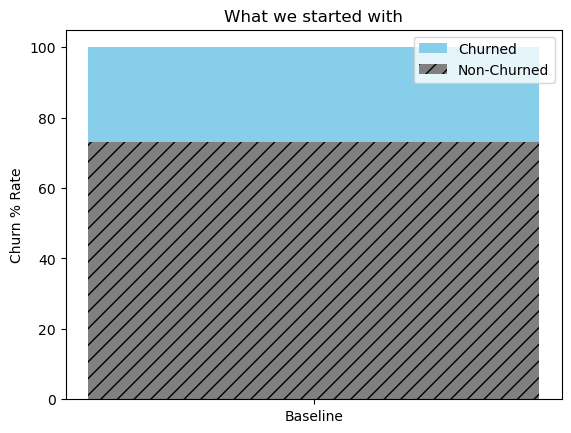

In [34]:
# create data
labels = ['Baseline']

y1 = [27]
y2 = [73]

# plot bars in stack manner
plt.bar(labels, y1, color='skyblue',bottom= y2)
                              
plt.bar(labels, y2, color='gray',hatch='//',)



plt.ylabel("Churn % Rate")
plt.legend(["Churned", "Non-Churned"])

plt.title('What we started with')

plt.savefig('baseline.png',bbox_inches='tight')

plt.show()

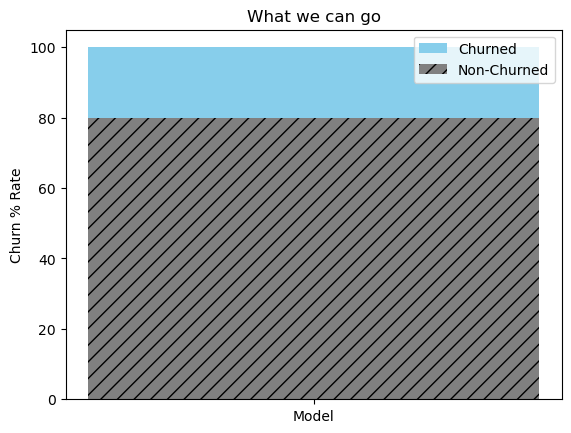

In [35]:
# create data
labels = ['Model']

y1 = [20]
y2 = [80]

# plot bars in stack manner
plt.bar(labels, y1, color='skyblue',bottom= y2)
                              
plt.bar(labels, y2, color='gray',hatch='//',)



plt.ylabel("Churn % Rate")
plt.legend(["Churned", "Non-Churned"])

plt.title('What we can go')

plt.savefig('model.png',bbox_inches='tight')

plt.show()

In [ ]:
t